In [7]:
import torch
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from torch import nn
import torch.optim as opt
data, labels = make_blobs(n_samples=1000, centers=4, n_features=2, random_state=0)
print(data.shape, labels.shape)

X_train, X_val, Y_train, Y_val = train_test_split(data, labels, stratify=labels, random_state=0)
print(X_train.shape, X_val.shape, labels.shape)


X_train, Y_train, X_val, Y_val = map(torch.tensor, (X_train, Y_train, X_val, Y_val))
print(X_train.shape, Y_train.shape)


(1000, 2) (1000,)
(750, 2) (250, 2) (1000,)
torch.Size([750, 2]) torch.Size([750])


In [8]:
X_train = X_train.float()
Y_train = Y_train.long()
X_val = X_val.float()
Y_val = Y_val.long()


In [9]:
def accuracy(y_hat, y):
    pred = torch.argmax(y_hat, dim=1)
    return (pred == y).float().mean()

# previous(Prof) one
def loss_fn(y_hat, y):
    return -(y_hat[range(y.shape[0]), y].log()).mean()

# My cross entropy function
def compute_loss(Y_hat,Y):
    sum=0
    n=Y.shape[0]
    for i in range(n):
        sum+=(Y_hat[i][Y[i]].log())
    return -sum/n

In [10]:
class Mymodel(nn.Module):
    def __init__(self):
        super().__init__()
        self.network=nn.Sequential(
            nn.Linear(2,5),
            nn.ReLU(),
            nn.Linear(5,4),
            nn.Softmax()
        )
        
    def forward(self,X):
        return self.network(X)

In [11]:
model=Mymodel()
optimizer = opt.SGD(model.parameters(), lr=0.01, momentum=0.9)
loss_lst=[]
acc_lst=[]
for i in range(50):
    y_hat=model(X_train)
    loss=loss_fn(y_hat,Y_train)
    loss1=compute_loss(y_hat,Y_train)
    loss2=nn.functional.cross_entropy(y_hat,Y_train)
    loss_lst.append(loss.item())

    print(loss.item(),loss1.item(),loss2.item())
    loss.backward()
    optimizer.step()
    acc_lst.append(accuracy(model(X_val),Y_val))
    optimizer.zero_grad()

/home/user/Downloads/yes/lib/python3.9/site-packages/torch/nn/modules/container.py:217: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


1.7210522890090942 1.7210525274276733 1.4429012537002563
1.6753036975860596 1.6753023862838745 1.4368793964385986
1.5969070196151733 1.596906304359436 1.425594687461853
1.5024690628051758 1.502470850944519 1.4098955392837524
1.4074400663375854 1.407439112663269 1.390761375427246
1.3228938579559326 1.3228933811187744 1.3694871664047241
1.2544691562652588 1.2544687986373901 1.347862720489502
1.203044056892395 1.2030431032180786 1.3278709650039673
1.166230320930481 1.1662306785583496 1.3109327554702759
1.140019178390503 1.1400195360183716 1.2974287271499634
1.120158076286316 1.120158314704895 1.2868716716766357
1.1030329465866089 1.103033423423767 1.2783863544464111
1.08611261844635 1.0861129760742188 1.2711325883865356
1.0680041313171387 1.0680034160614014 1.2644970417022705
1.0483299493789673 1.0483299493789673 1.2581509351730347
1.0274025201797485 1.027402639389038 1.2519770860671997
1.005957007408142 1.0059577226638794 1.246019721031189
0.9848127365112305 0.9848131537437439 1.24036037

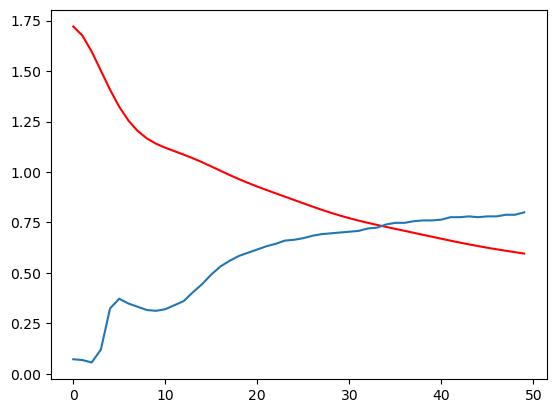

In [12]:
import matplotlib.pyplot as plt
plt.plot(loss_lst,'r')
plt.plot(acc_lst)
plt.show()